Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

Описание данных
В вашем распоряжении база данных об авиаперевозках.
Таблица airports — информация об аэропортах:
airport_code — трёхбуквенный код аэропорта
airport_name — название аэропорта
city — город
timezone — временная зона
Таблица aircrafts — информация о самолётах:
aircraft_code — код модели самолёта
model — модель самолёта
range — дальность полёта
Таблица tickets — информация о билетах:
ticket_no — уникальный номер билета
passenger_id — персональный идентификатор пассажира
passenger_name — имя и фамилия пассажира
Таблица flights — информация о рейсах:
flight_id — уникальный идентификатор рейса
departure_airport — аэропорт вылета
departure_time — дата и время вылета
arrival_airport — аэропорт прилёта
arrival_time — дата и время прилёта
aircraft_code — id самолёта
Таблица ticket_flights — стыковая таблица «рейсы-билеты»
ticket_no — номер билета
flight_id — идентификатор рейса
Таблица festivals — информация о фестивалях
festival_id — уникальный номер фестиваля
festival_date — дата проведения фестиваля
festival_city — город проведения фестиваля
festival_name — название фестиваля

### Проведем исследовательский анализ данных средствами SQL

#### Найдем количество рейсов на каждой модели самолёта с вылетом в сентябре 2018 года. Назовtv получившееся поле flights_amount и выведим его. Также напечатаем на экране поле model. Столбцы в таблице должны быть выведены в следующем порядке:
model,
flights_amount

```python
SELECT
    aircrafts.model AS model,
    COUNT(flights.aircraft_code) AS flights_amount
FROM 
    aircrafts
INNER JOIN flights ON flights.aircraft_code = aircrafts.aircraft_code
WHERE 
    EXTRACT(MONTH FROM flights.departure_time) = '9'
    AND EXTRACT(YEAR FROM flights.departure_time) = '2018'
GROUP BY
    aircrafts.model,
    flights.aircraft_code
```    

```
MODEL	           FLIGHTS_AMOUNT
Airbus A319-100	    607
Airbus A321-200	    960
Boeing 737-300	    630
Boeing 767-300   	600
Boeing 777-300   	300
Bombardier CRJ-200	4446
Cessna 208 Caravan	4557
Sukhoi SuperJet-100	4185
```


#### Посчитаем количество отправленных рейсов по всем моделям самолётов Boeing и Airbus в сентябре. Назовем получившуюся переменную flights_amount и выведем её.

```
FROM 
    flights
INNER JOIN aircrafts ON aircrafts.aircraft_code = flights.aircraft_code
WHERE 
     EXTRACT(MONTH FROM flights.departure_time) = '9'
     AND (aircrafts.model LIKE 'Boeing%' OR aircrafts.model LIKE 'Airbus%')
GROUP BY
   aircrafts.model =
   CASE WHEN aircrafts.model LIKE 'Boeing%' THEN '1'
         WHEN aircrafts.model LIKE 'Airbus%' THEN '1'
         ELSE aircrafts.model END;
```


```
FLIGHTS_AMOUNT
3097
```

#### Посчитайтаем среднее количество прибывающих рейсов в день для каждого города за август 2018 года. Назовем получившееся поле average_flights, вместе с ним выведем столбец city.

```
SELECT 
    flc.city as city,
    AVG(flc.cnt) AS average_flights 
FROM 
    (SELECT
        COUNT(flights.flight_id) AS cnt,
        airports.city AS city,
        DATE_TRUNC('day', flights.arrival_time) AS date
     FROM 
         airports
         INNER JOIN flights ON airports.airport_code = flights.arrival_airport
     GROUP BY 
         city,
         date) AS flc
GROUP BY 
     flc.city
     ```

```
CITY	AVERAGE_FLIGHTS
Абакан	3.85124
Анадырь	1
Анапа	2.1405
Архангельск	5.28926
Астрахань	2.42975
Барнаул	2.57851
Белгород	6
Белоярский	2
Благовещенск	1
Братск	1
Брянск	10
Бугульма	3
Владивосток	2.97541
Владикавказ	2
Волгоград	5.1405
Воркута	4.57851
Воронеж	2
Геленджик	2.59302
Горно-Алтайск	1.43802
Грозный	1.14876
Екатеринбург	11.2893
Иваново	1
Ижевск	1
Иркутск	6
Йошкар-Ола	4.28926
Казань	7.71901
Калининград	2.57851
Калуга	2
Кемерово	2
Киров	6
Когалым	3.1405
Комсомольск-на-Амуре	1
Краснодар	3.8595
Красноярск	11.5785
Курган	3.43802
Курск	2.28926
Кызыл	1.24638
Липецк	1.24286
Магадан	1.32692
Магнитогорск	4
Махачкала	3.28926
Минеральные Воды	3.42975
Мирный	6.28926
Москва	129.711
Мурманск	2
Надым	2.28926
Нальчик	3
Нарьян-Мар	2.57025
Нерюнгри	2.57025
Нефтеюганск	1
Нижневартовск	3.1405
Нижнекамск	3.71074
Нижний Новгород	5.8595
Новокузнецк	6
Новосибирск	17.281
Новый Уренгой	8.28926
Норильск	2.28926
Ноябрьск	3
Нягань	1
Омск	3.28926
Оренбург	5
Орск	1.5977
Пенза	4
Пермь	10.1488
Петрозаводск	5.85124
Петропавловск-Камчатский	1
Псков	1.57025
Ростов-на-Дону	10.1405
Салехард	2
Самара	3
Санкт-Петербург	31.1488
Саранск	2
Саратов	4
Советский	9
Сочи	9.57025
Ставрополь	2
Стрежевой	1
Сургут	8.71901
Сыктывкар	4.1405
Тамбов	4
Томск	4.1405
Тюмень	7.00826
Удачный	3
Улан-Удэ	1.5977
Ульяновск	9.57851
Урай	2
Усинск	1
Усть-Илимск	2.8595
Усть-Кут	1
Уфа	6.28926
Ухта	3
Хабаровск	6.52459
Ханты-Мансийск	8.43802
Чебоксары	5
Челябинск	6.71901
Череповец	2.1405
Чита	1.57851
Элиста	4.8595
Южно-Сахалинск	4.2541
Якутск	2.69672
Ярославль	1.28099
```



### Соберем данные для анализа из базы

#### Установим фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили. Выведем название фестиваля festival_name и номер недели festival_week.

```
SELECT 
    festival_name,
    EXTRACT(WEEK FROM festival_date)  AS festival_week
FROM festivals
WHERE
     festival_city = 'Москва'
GROUP BY 
     festival_week,
     festival_name
     ```  

```FESTIVAL_NAME	FESTIVAL_WEEK
    Park Live	    30
    Пикник Афиши	31
    Видфест	        36
```

#### Для каждой недели с 23 июля по 30 сентября 2018 года посчитаем количество приобретённых билетов в Москву. Номер недели назовем week_number, количество билетов — ticket_amount. 
#### Наш запрос соединится с запросом из предыдущей задачи оператором LEFT JOIN. D ячейках с неделями, в которые фестивали не проходили, будут значения nan

```
SELECT 
	T.week_number,
	T.ticket_amount,
	T.festival_week,
	T.festival_name
FROM 
(
(SELECT
     EXTRACT(WEEK FROM flc.arrival_time)  AS week_number,
     COUNT(ticket_flights.ticket_no) AS ticket_amount
 FROM 
     (SELECT
           flights.flight_id,
           airports.city,
           flights.arrival_time
      FROM flights
           INNER JOIN airports ON airports.airport_code  = flights.arrival_airport
      GROUP BY
          flights.flight_id, airports.city, flights.arrival_time 
     ) AS flc
     
     INNER JOIN ticket_flights ON ticket_flights.flight_id  = flc.flight_id 
WHERE
		flc.city = 'Москва' AND
	   CAST(flc.arrival_time AS date) BETWEEN '2018-07-23' AND '2018-09-30'  
 GROUP BY 
     week_number
) t
LEFT JOIN 
(SELECT 		
		festival_name,	
		EXTRACT (week FROM festivals.festival_date) AS festival_week
	FROM 
		festivals
	WHERE
		festival_city = 'Москва' AND CAST(festivals.festival_date AS date) BETWEEN '2018-07-23' AND '2018-09-30') t2 
   ON 
	t.week_number = t2.festival_week) AS T;
```

```
WEEK_NUMBER	TICKET_AMOUNT	FESTIVAL_WEEK	FESTIVAL_NAME
31      	51034               	31      	Пикник Афиши
33	        51378	                nan	
34   	    51492	                nan	
38  	    51518                  	nan	
35  	    51360               	nan	
32  	    51675               	nan	
36  	    51386	                36	        Видфест
39  	    51623	                nan	
30      	43568	                30	        Park Live
37      	51670               	nan	
```

**Шаг 1.  Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Пороговое значение *alpha* задайте самостоятельно.

Поясните:

- Как вы формулировали нулевую и альтернативную гипотезы;
- Какой критерий использовали для проверки гипотез и почему.

# 1. Аналитика

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math as mt
import numpy as np
from scipy import stats as st 
import seaborn as sns
import scipy as sp 
import scipy.stats

In [2]:
# прочитаем данные по моделям самолетов и количеству рейсов
df_1 = pd.read_csv('/datasets/query_1.csv')
df_1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
df_1.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


### По полученым даным видим наличие двух столбцов с указанием модели салолета и количества совершеных ими рейсов в сентябре 2018 года. Отсутсвующих значений нет. Среднее количество рейсов равно 2035, максимальное 4557, минимальное 300, медиана равна 795. Всего в авиакомпании используются 8 моделей самолетов.

In [5]:
# прочитаем данные о названии городов и среднем количестве рейсов, прибывающих в город (city) за день в сентябре 2018 года.
df_2 = pd.read_csv('/datasets/query_3.csv')
df_2.head(5)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [6]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [7]:
df_2.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


### Получили таблицу содержащую информацию о 101 городе и среднем количестве рейсов, прибывающих в город (city) за день в сентябре 2018 года. Данные выглядят корректными, отсутствующих значений нет. Максимальное количество рейсов по городам составило 129, минимальное 1, а средее количество и медиана составили 5,49 и 3 соответствено. 

In [8]:
# прочитаем данные о номере недели, количестве проданных билетов и наличие в неделе фистеваля
df_3 = pd.read_csv('/datasets/query_last.csv')
df_3.head(50)

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [9]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


In [10]:
df_3.describe()

,week_number,ticket_amount,festival_week
count,10.00000,10.000000,3.000000
mean,34.50000,50670.400000,32.333333
std,3.02765,2502.752716,3.214550
min,30.00000,43568.000000,30.000000
25%,32.25000,51364.500000,30.500000
50%,34.50000,51439.000000,31.000000
75%,36.75000,51596.750000,33.500000
max,39.00000,51675.000000,36.000000


### Получили таблицу имеющие отсутствующие значения в столбцах номер недели фестиваля (festival_week) и в названии фестивля (festival_name). Проведем подготовку данных. Номера недели в столбце festival_week соответствуют номерам недели в столбце week_number - приравняем значения для удаления пропусков. Пропуски в названии фестиваля заменим на индикаторные значения равные 0.

In [11]:
df_3['festival_week'] = df_3['week_number'] # обработаем значения в номере недели

In [12]:
df_3 = df_3.fillna(0) # заполним пропуски в названии фестиваля

In [13]:
df_3

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30,Park Live
1,31,51034,31,Пикник Афиши
2,32,51675,32,0
3,33,51378,33,0
4,34,51492,34,0
5,35,51360,35,0
6,36,51386,36,Видфест
7,37,51670,37,0
8,38,51518,38,0
9,39,51623,39,0


### Построим график распределения количества рейсов от модели самолета.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

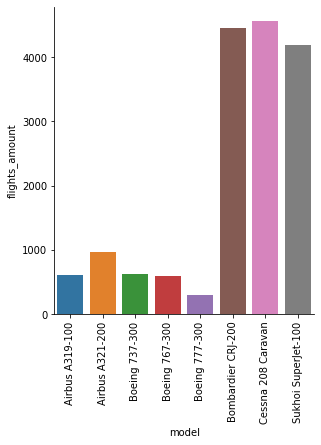

In [14]:
sns.catplot(data = df_1, x='model', y='flights_amount', kind='bar')
plt.xticks(rotation=90)

###  По графику видно, что максимальное количество рейсов приходится на модели Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100. Данные самолеты относятся к категории ближнемагистральных. Возможно авиакомпания специализируется на внутрирегиональных перевозках, а дальние направления менее развиты.

### построим график распределения количества рейсов от города прибытия

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 <a list of 101 Text xticklabel objects>)

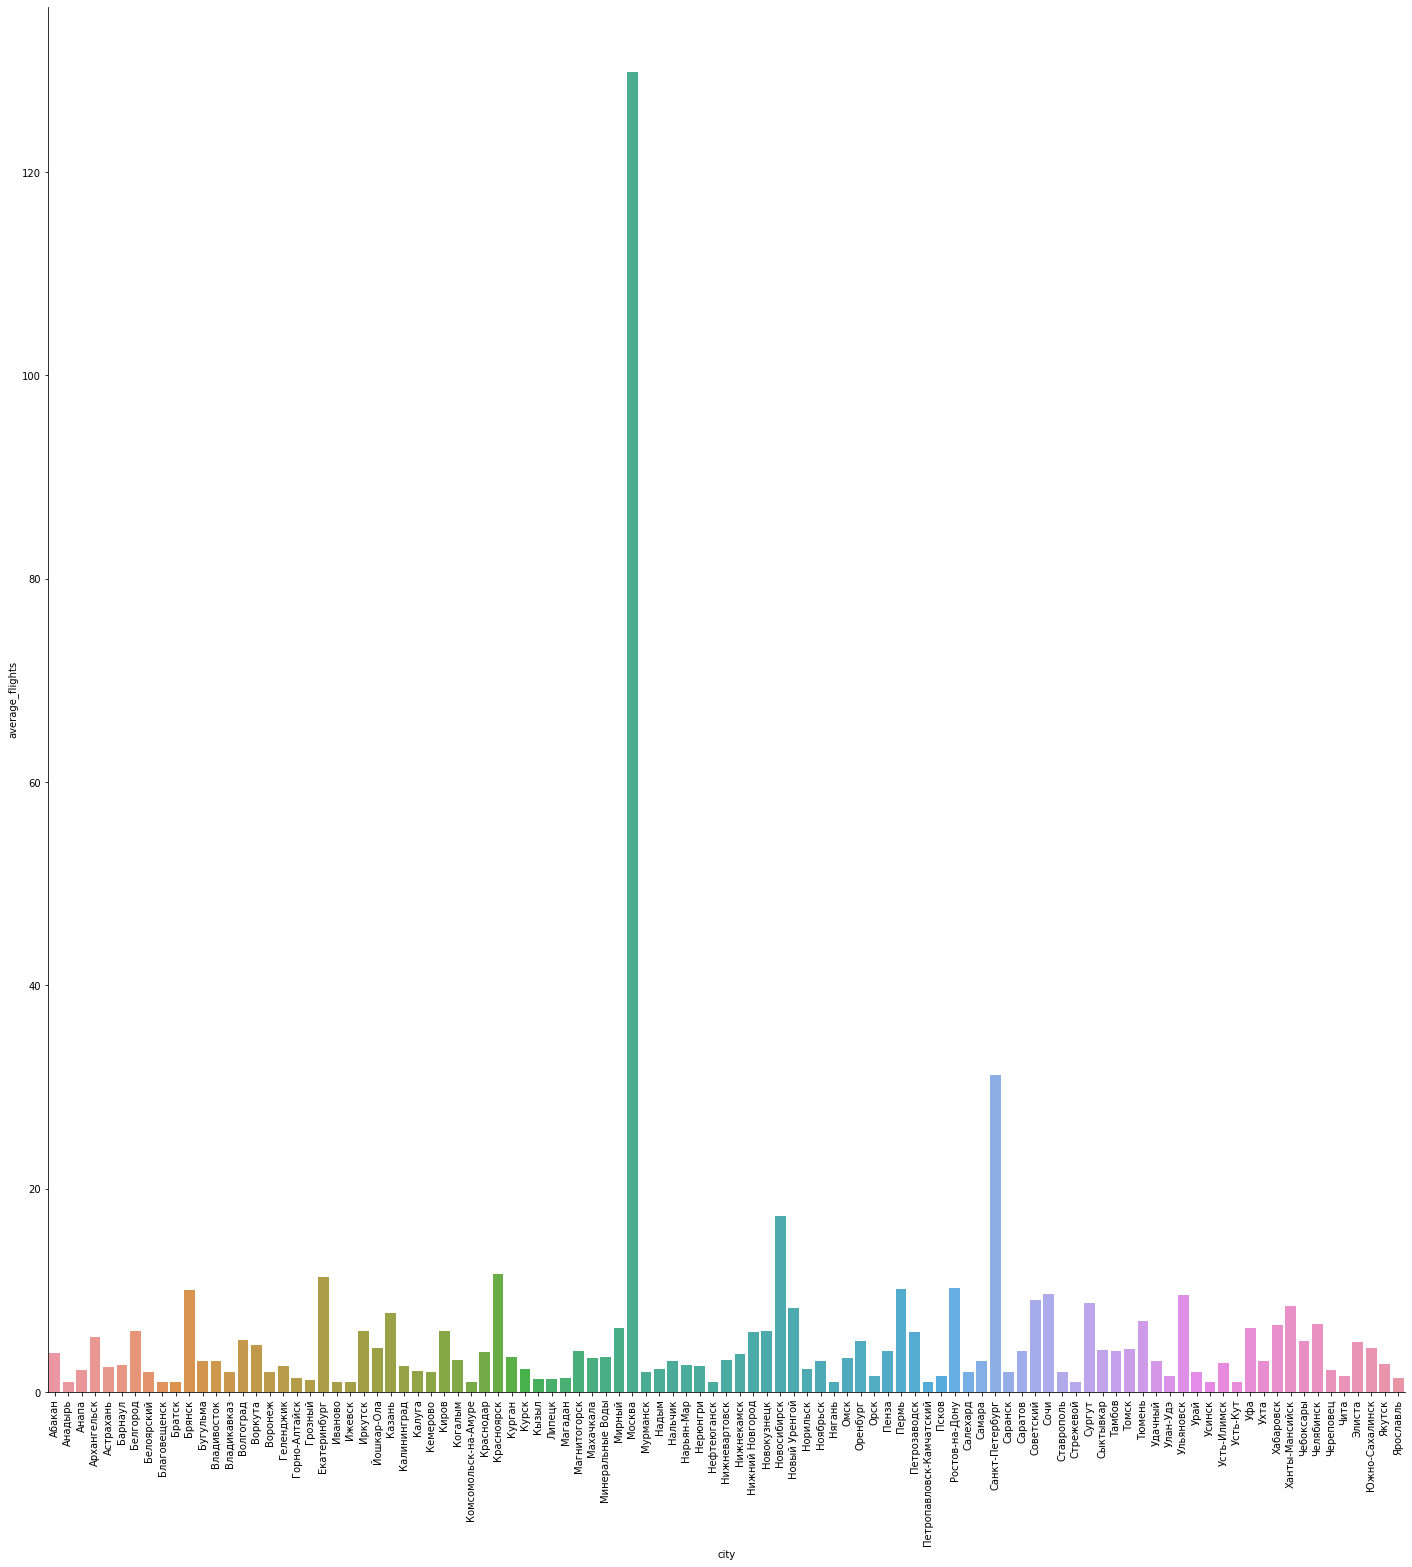

In [15]:
sns.catplot(data = df_2, x='city', y='average_flights', kind='bar', size=20)
plt.xticks(rotation=90)

### На графике заметны значительные выбросы по Москве и Санкт-Петербургу, а также менее значительные по ряду других городов

### Сделаем выборку по 10 городам с наибольшим количестивом рейсов.

In [16]:
df_2_top10 = df_2.sort_values(by = 'average_flights', ascending = False).head(10)

In [17]:
df_2_top10

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

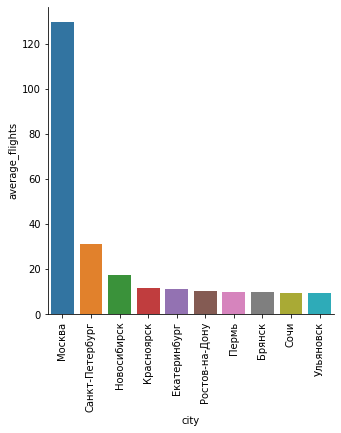

In [18]:
sns.catplot(data = df_2_top10, x='city', y='average_flights', kind='bar')
plt.xticks(rotation=90)

### По полученным данным видно наибольшее количество рейсов приходится на Москву, что вполне ожидаемо, т.к. это крупнейший транспортный хаб. Далее следуют другие крупные транспорные узлы Санкт_Петербург, Новосибирск, Красноярск, Екатеринбург и Ростов-на-Дону.

# 2. Проверка гипотезы

### Сформулируем нулевую гипотезу как то, что средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время. Альтернативной гипотезой установим неравенство среднего спроса. Пороговое значение alpha примем равным 5%. Так как выборки средних независимы применим метод st.ttest_ind.

In [19]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h 

In [20]:
# создадим выборки в зависимости от наличия фестиваля в неделе
data_1 = df_3.query('festival_name == 0')['ticket_amount']
data_2 = df_3.query('festival_name != 0')['ticket_amount']

In [21]:
# оценим диспарсии выборок если они не равны, то применим equal_var=False
print(np.var(data_1))
print(np.var(data_2))


14694.408163265309
12998464.888888888


In [22]:
# установим параметр alpha равным 0,05
alpha = 0.05
results = st.ttest_ind(data_1, data_2, equal_var=False)
print('p-значение',results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print()
print('среднее количество проданых билетов в неделю \n с фестивалями с доверительными интервалами',
      mean_confidence_interval(data_1))
print('среднее количество проданых билетов в неделю \n без фестивалей с доверительными интервалами',
      mean_confidence_interval(data_2))

p-значение 0.377432493172683
Не получилось отвергнуть нулевую гипотезу

среднее количество проданых билетов в неделю 
 с фестивалями с доверительными интервалами (51530.857142857145, 51409.764223837876, 51651.950061876414)
среднее количество проданых билетов в неделю 
 без фестивалей с доверительными интервалами (48662.666666666664, 37693.65924921319, 59631.67408412014)


### Учитывая то, что выборки очень малы  (общее количество наблюдений равно 10), попробуем применить U-тест Манна-Уитни. Хотя для того чтобы тест был эффективным, требуется не менее 20 наблюдений в каждой выборке данных. 

In [23]:
from scipy.stats import mannwhitneyu

In [25]:
stat, p = mannwhitneyu(data_1, data_2)
print('U-статистика=%.3f, p-значение=%.3f' % (stat, p))

U-статистика=2.000, p-значение=0.034


### На основании проведеной проверки гипотезы с помощью  метода  U-тестом Манна-Уитни сравним полученое значение с табличным  https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html. Для значений размеров выборок 3 и 7 табличное значение равно 1, а полученое равно 2. Следовательно нет достаточных оснований для отклонения нулевой гипотезы.